In [1]:
import numpy as np
import pandas as pd

import nltk
from nltk.corpus import stopwords
import string

In [2]:
data = pd.read_csv('self-driving-cars-tweets.csv')
#data = data.tail(30)

In [3]:
data.count()

sentiment    981
text         981
dtype: int64

In [4]:
def wordcloud_draw(text):
    #words = ' '.join(data)
    cleaned_word = " ".join([word for word in text.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    return cleaned_word

data['cleaned_text'] = data['text'].apply(lambda x: wordcloud_draw(x))

data.head()  

,sentiment,text,cleaned_text
0,Postive,@manjulamartin @Kirk_Gleason Except trains are...,Except trains are very capital intensive and h...
1,Postive,I want a Google driverless car.,I want a Google driverless car.
2,Postive,@Oatmeal @google driverless @TeslaMotors ? Ooo...,driverless ? Ooooh that would be awesome!!
3,Postive,SO MUCH AWESOME! Amazing video for GoogleÃŒÂ¢â...,SO MUCH AWESOME! Amazing video for GoogleÃŒÂ¢â...
4,Postive,@google is making driverless cars which is awe...,is making driverless cars which is awesome


In [5]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

i = 0

data['prediction'] = ''
data['compound'] = ''

threshold = 0

sid = SentimentIntensityAnalyzer()
for sentence in data['cleaned_text']:
    vs = sid.polarity_scores(sentence)
    comp = vs['compound']
    #print(comp)
    #neu = vs['neu']
    #neg = vs['pos']
    #pos = vs['neg']
    #if vs['compound'] >= threshold or vs['compound'] <= -threshold:
    if comp > 0.2 :
        data['prediction'][i] = 'Postive'
        data['compound'][i] = comp
            #data['neutral-score'][i] = neu
            #data['positive-score'][i] = pos
            #data['negative-score'][i] = neg
    elif comp < 0 :
        data['prediction'][i] = 'Negative'
        data['compound'][i] = comp
            #data['neutral-score'][i] = neu
            #data['positive-score'][i] = pos
            #data['negative-score'][i] = neg
    else:
        data['prediction'][i] = 'Neutral'
        data['compound'][i] = comp
            #data['neutral-score'][i] = neu
            #data['positive-score'][i] = pos
            #data['negative-score'][i] = neg
    #else:
        #data['prediction'][i] = 'Null'
    i = i + 1

/Users/apple/anaconda3/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [6]:
data.head(30)

,sentiment,text,cleaned_text,prediction,compound
0,Postive,@manjulamartin @Kirk_Gleason Except trains are...,Except trains are very capital intensive and h...,Postive,0.5106
1,Postive,I want a Google driverless car.,I want a Google driverless car.,Neutral,0.0772
2,Postive,@Oatmeal @google driverless @TeslaMotors ? Ooo...,driverless ? Ooooh that would be awesome!!,Postive,0.6892
3,Postive,SO MUCH AWESOME! Amazing video for GoogleÃŒÂ¢â...,SO MUCH AWESOME! Amazing video for GoogleÃŒÂ¢â...,Postive,0.9157
4,Postive,@google is making driverless cars which is awe...,is making driverless cars which is awesome,Postive,0.6249
5,Postive,You could call a driverless car and tell the c...,You could call a driverless car and tell the c...,Neutral,0
6,Postive,ÃŒÂ¢â€°Ã¢Ã‚ÂÃ’@Marketplace: Google's driverle...,ÃŒÂ¢â€°Ã¢Ã‚ÂÃ’@Marketplace: Google's driverle...,Neutral,0
7,Postive,Driverless taxis in NYC would probably be an a...,Driverless taxis in NYC would probably be an a...,Postive,0.5859
8,Postive,This whole @google driverless car prototype th...,This whole driverless car prototype thing is a...,Postive,0.6249
9,Postive,Google's New Driverless Car Has No Brake Pedal...,Google's New Driverless Car Has No Brake Pedal...,Postive,0.34


In [145]:
newdata = data[data['prediction']!='Null']
len(newdata)

981

In [148]:
temp = data[['sentiment','compound']]
temp['compound'] = temp['compound'].astype(float)
#temp['neutral-score'] = temp['neutral-score'].astype(float)
#temp['positive-score'] = temp['positive-score'].astype(float)
#temp['negative-score'] = temp['negative-score'].astype(float)
posMax = temp.groupby(['sentiment']).max()
posMin = temp.groupby(['sentiment']).min()
print(posMax.head())
print(posMin.head())

           compound
sentiment          
Negative     0.8176
Neutral      0.8658
Postive      0.9213
           compound
sentiment          
Negative    -0.9380
Neutral     -0.8779
Postive     -0.8932


/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [147]:
tp = len(newdata[(newdata.sentiment == 'Postive') & (newdata.prediction == 'Postive')])
tn = len(newdata[(newdata.sentiment == 'Negative') & (newdata.prediction == 'Negative')])
trn = len(newdata[(newdata.sentiment == 'Neutral') & (newdata.prediction == 'Neutral')])
top = len(newdata[(newdata.sentiment == 'Neutral')])
fp = len(newdata[(newdata.sentiment == 'Postive')])
fn = len(newdata[(newdata.sentiment == 'Negative')])
print ("True Positives: {}".format(tp))
print ("True Negatives:", tn)
print ("True Neutral:", trn)
print ("Total Neutral:", top)
print ("Total Positives:", fp)
print ("Total Negatives:", fn)
total = len(newdata)
#r = float(tp)/(tp + fn)
#print ("recall", r)

p = (tp) / (fp)
print ("precision - positive", p)

p1 = (tn) / (fn)
print ("precision - negative", p1)

p2 = (trn) / (top)
print ("precision - neutral", p2)

true = len(newdata[(newdata.sentiment == newdata.prediction)])
false = total - true
print()
print('Correctly predicted = ', true)
print('Accuracy = ', true/total)

True Positives: 118
True Negatives: 68
True Neutral: 340
Total Neutral: 603
Total Positives: 238
Total Negatives: 140
precision - positive 0.4957983193277311
precision - negative 0.4857142857142857
precision - neutral 0.5638474295190713

Correctly predicted =  526
Accuracy =  0.5361875637104995


In [8]:
!pip install wordcloud

    100% |████████████████████████████████| 174kB 5.4MB/s ta 0:00:01
  Running setup.py bdist_wheel for wordcloud ... done
  Stored in directory: /Users/apple/Library/Caches/pip/wheels/3e/40/7c/d768cb5022ec6aa5611728339886bc1e9f0b629547f39237fd
Successfully built wordcloud


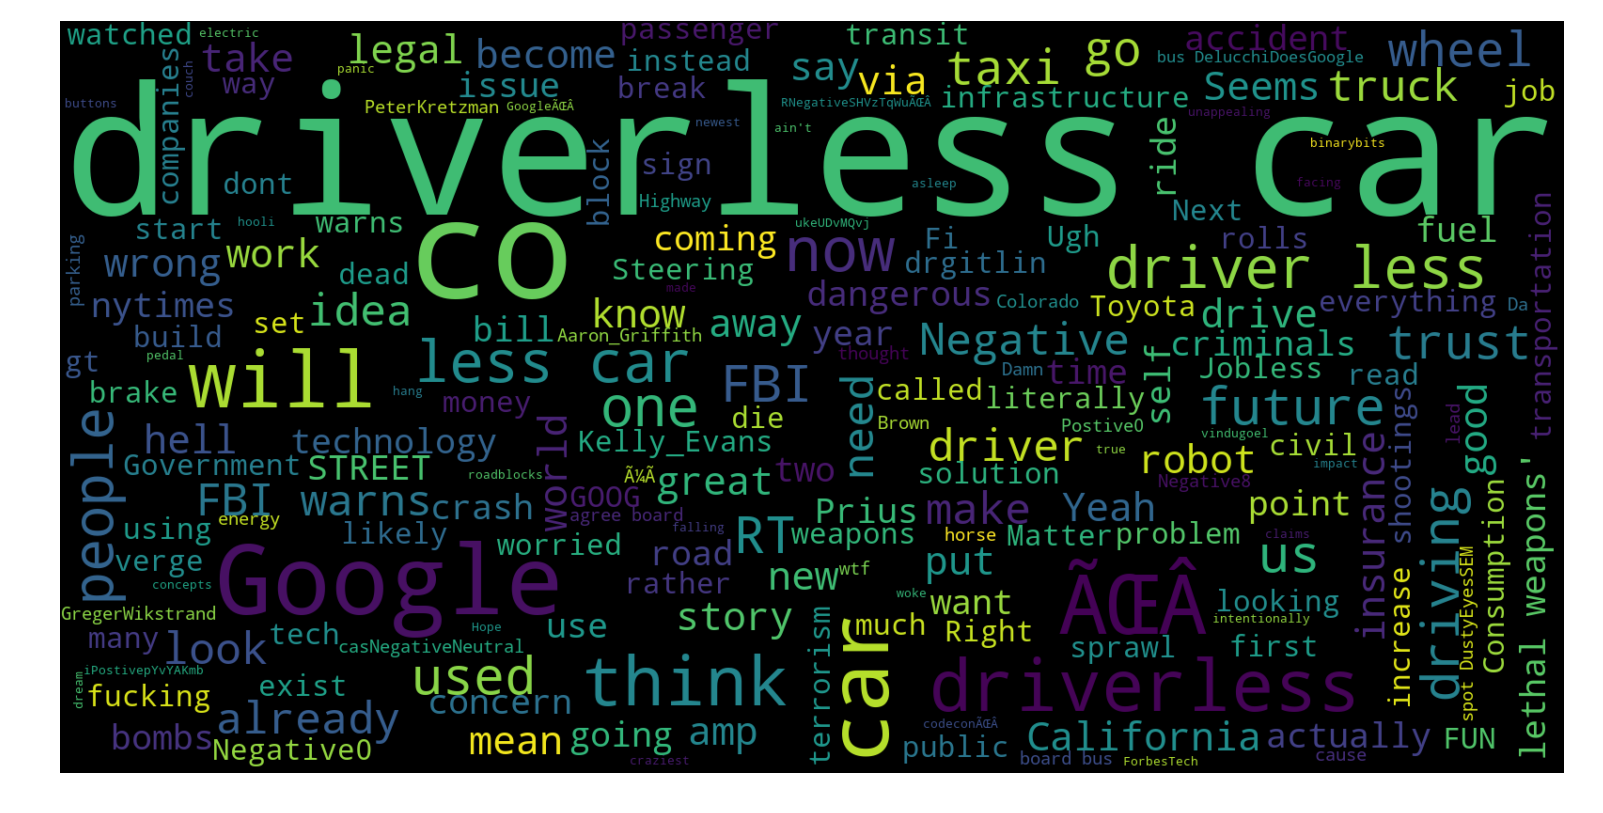

In [22]:
from wordcloud import WordCloud
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
neg_tweets = data[data.sentiment == 'Negative']
neg_string = []
for t in neg_tweets.text:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

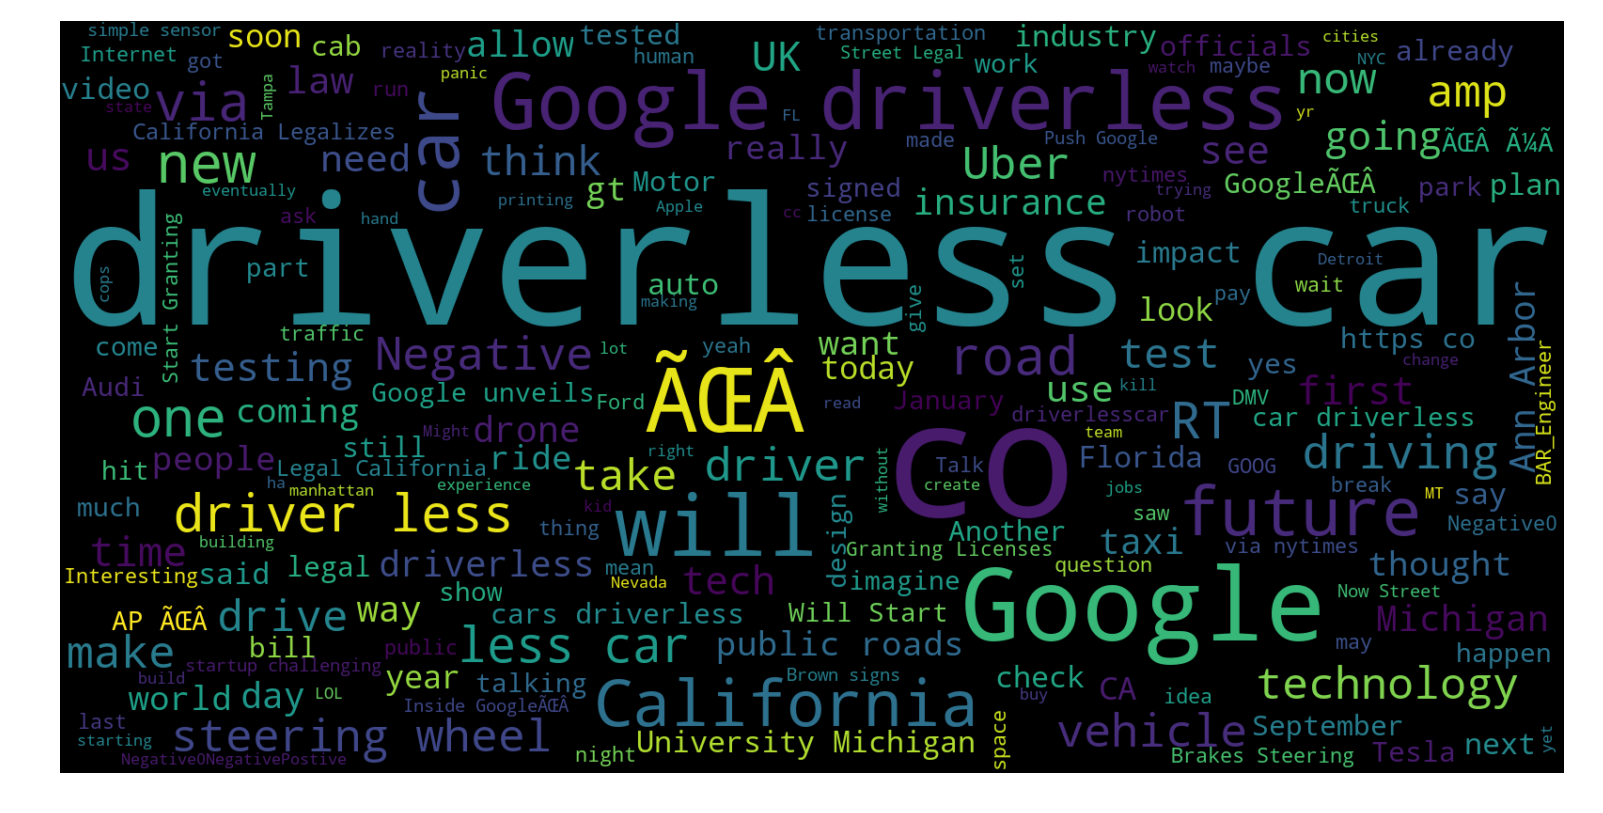

In [23]:
from wordcloud import WordCloud
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

neu_tweets = data[data.sentiment == 'Neutral']
neu_string = []
for t in neu_tweets.text:
    neu_string.append(t)
neu_string = pd.Series(neu_string).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neu_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()